In [ ]:
!pip install comet_ml

In [74]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="vsNTC2o8UVKvzgsD124nWXkbt",
    project_name="classification-predict-team-4",
    workspace="beebeefaith",
) 

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in 'C:\\Users\\User\\Documents\\My_Doc\\EDSA\\Classification\\Overview\\edsa-climate-change-belief-analysis-2022' nor in any parent directory. You can override where Comet is looking for a Git Patch by setting the configuration `COMET_GIT_DIRECTORY`
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/beebeefaith/classification-predict-team-4/df434f1c1cfc46ee9b9bdc3449d2c4d4



# Climate Change Belief Analysis 2022


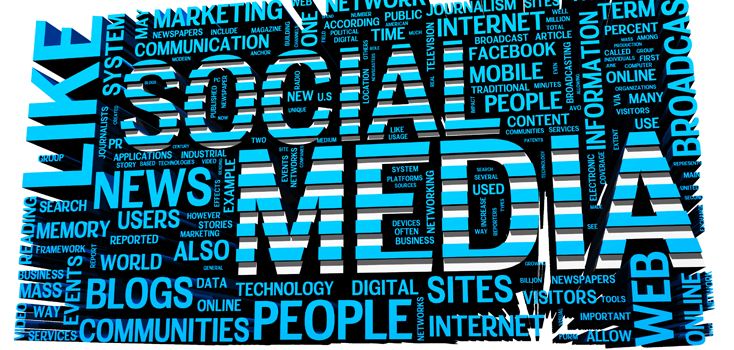

### About the problem

Many companies are built around lessening one’s environmental impact or carbon footprint. They     offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.
                
### The Objective

Create a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.


Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.


                
   
                
                
            


<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

<a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>



In [75]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords,wordnet
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.stem import PorterStemmer

# Libraries for model building
import tensorflow
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB

# Libraries for data preprocessing and model performance
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer, ENGLISH_STOP_WORDS
from sklearn.metrics import confusion_matrix, f1_score,classification_report, accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.utils import resample





[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [143]:
# Let us import our test, train and submission data

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
samplesubmission = pd.read_csv('sample_submission.csv')

print(train.shape)
print(test.shape)
print(samplesubmission.shape)

(15819, 3)
(10546, 2)
(10546, 2)


From the print above, we have 3 features to work with....
Next, let us get a better view at the content.

In [77]:
train.head(3)

,sentiment,message,tweetid
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221
1,1,It's not like we lack evidence of anthropogenic global warming,126103
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562


In [78]:
test.head(3)

,message,tweetid
0,Europe will now be looking to China to make sure that it is not alone in fighting climate change… https://t.co/O7T8rCgwDq,169760
1,Combine this with the polling of staffers re climate change and womens' rights and you have a fascist state. https://t.co/ifrm7eexpj,35326
2,"The scary, unimpeachable evidence that climate change is already here: https://t.co/yAedqcV9Ki #itstimetochange #climatechange @ZEROCO2_;..",224985


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [79]:
# Check for null values

train.isnull().any()
test.isnull().any()

message    False
tweetid    False
dtype: bool

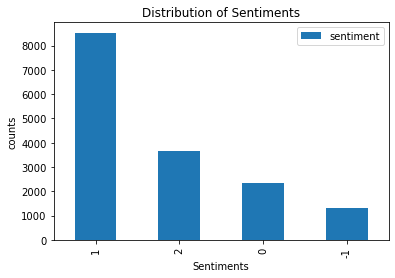

In [80]:
#Lets take a look at the breakdown of sentiments (target variable)

pd.value_counts(train['sentiment']).plot.bar()
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiments')
plt.ylabel('counts')
plt.legend()
plt.show()

######  --Observations--

We can see from the graph above that our sentiments are imbalanced and multiclass.
This might have some impact in the model building. 
We will work on balancing the data later

In [81]:
# Get actual count and statistics of the target variable
train.groupby('sentiment').describe()

tweetid                                                             \
            count           mean            std     min        25%       50%   
sentiment                                                                      
-1         1296.0  499169.447531  289509.003781  1422.0  243479.25  494572.0   
 0         2353.0  496550.249894  286519.834520  229.0   250733.00  483496.0   
 1         8530.0  507418.550762  289537.581404  6.0     257622.75  511867.5   
 2         3640.0  492613.500275  289163.550697  86.0    246628.25  490980.0   

                                
                 75%       max  
sentiment                       
-1         759714.75  999537.0  
 0         734897.00  999888.0  
 1         761983.50  999698.0  
 2         738188.50  999236.0

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

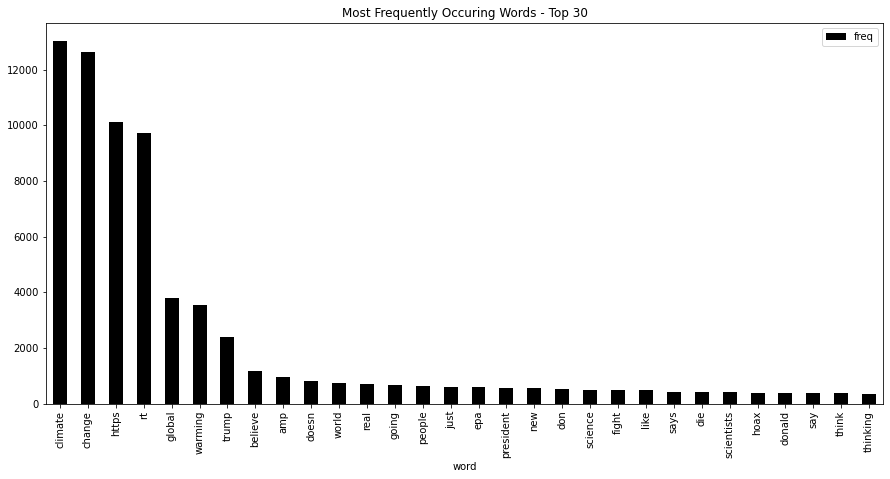

In [82]:
# Lets take a look at the most occuring words in our train dataset


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train.message)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'black')
plt.title("Most Frequently Occuring Words - Top 30")

###### Observation
From the graph above, The 6 most frequent words are (climate, change, https, rt, global, warming )

##### Let take a deeper view by building wordclouds for all the different sentiments in our dataset

Text(0.5, 1.0, 'WordCloud - Vocabulary from General Tweets')

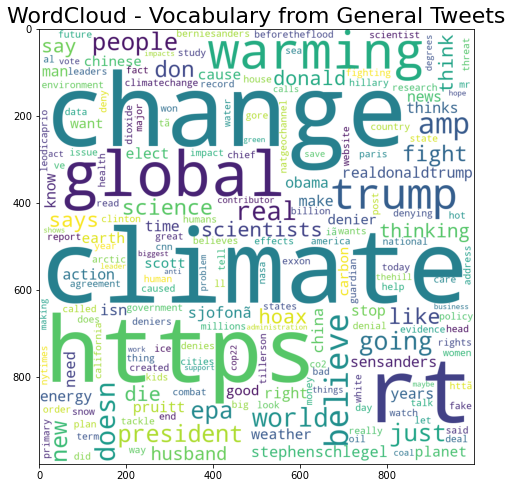

In [83]:
wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from General Tweets", fontsize = 22)

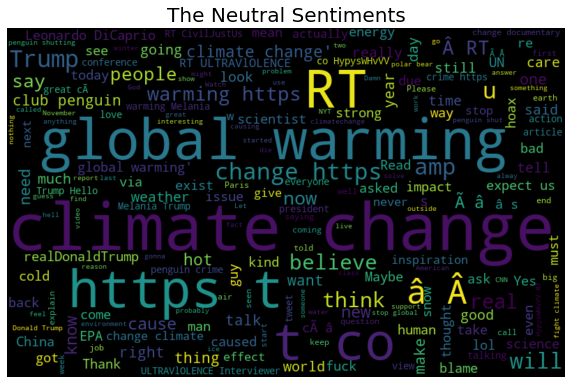

In [84]:
neutral_words =' '.join([text for text in train['message'][train['sentiment'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(neutral_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Sentiments', fontsize = 20)
plt.show()

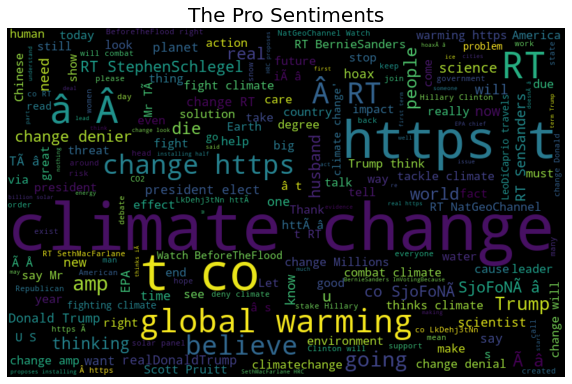

In [85]:
pro_words =' '.join([text for text in train['message'][train['sentiment'] == 1]])

wordcloud = WordCloud( width=800, height=500, random_state = 0, max_font_size = 110).generate(pro_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Pro Sentiments', fontsize = 20)
plt.show()

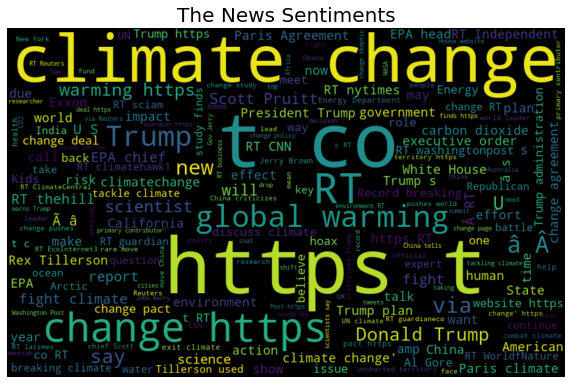

In [86]:
news_words =' '.join([text for text in train['message'][train['sentiment'] == 2]])

wordcloud = WordCloud( width=800, height=500, random_state = 0, max_font_size = 110).generate(news_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The News Sentiments', fontsize = 20)
plt.show()

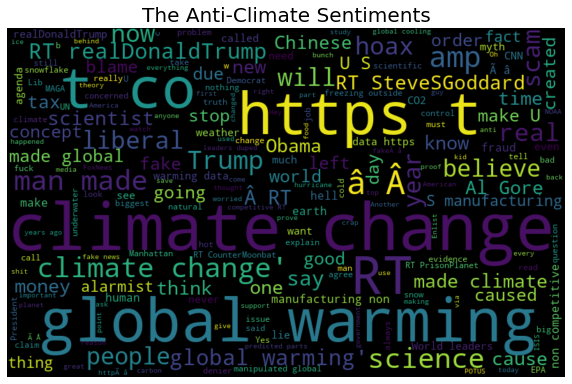

In [87]:
anti_words =' '.join([text for text in train['message'][train['sentiment'] == -1]])

wordcloud = WordCloud( width=800, height=500, random_state = 0, max_font_size = 110).generate(anti_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Anti-Climate Sentiments', fontsize = 20)
plt.show()

#### Observation
###### Across the sentiments, "Climate,Change, Global, Warming" seems to be the most commonly used words

In [88]:
# Next, lets take a look at our hashtags

def hashtag_extract(x):
    hashtags = []    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [89]:
# extracting hashtags from News tweets
HT_News = hashtag_extract(train['message'][train['sentiment'] == 2])

# extracting hashtags from Pro tweets
HT_Pro = hashtag_extract(train['message'][train['sentiment'] == 1])

# extracting hashtags from neutral tweets
HT_Neutral = hashtag_extract(train['message'][train['sentiment'] == 0])

# extracting hashtags from anti-climate tweets
HT_Anti = hashtag_extract(train['message'][train['sentiment'] == -1])

# unnesting list
HT_News = sum(HT_News,[])
HT_Pro = sum(HT_Pro,[])
HT_Neutral = sum(HT_Neutral,[])
HT_Anti = sum(HT_Anti,[])

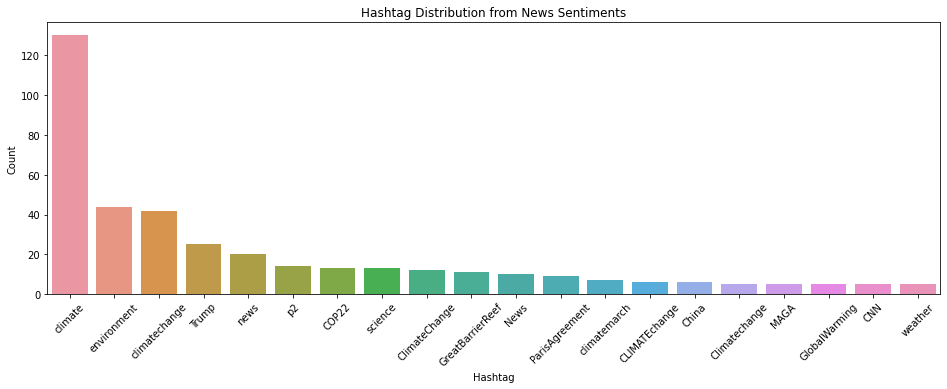

In [90]:
a = nltk.FreqDist(HT_News)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.title('Hashtag Distribution from News Sentiments')
plt.xticks(rotation=45)
plt.show()

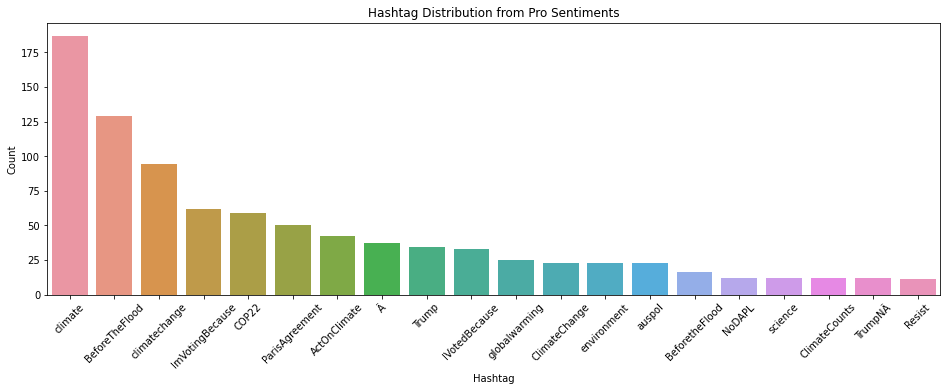

In [91]:
a = nltk.FreqDist(HT_Pro)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.title('Hashtag Distribution from Pro Sentiments')
plt.xticks(rotation=45)
plt.show()

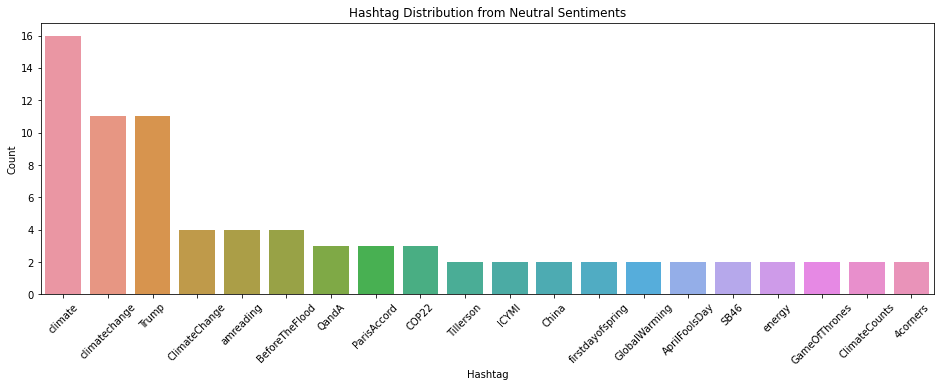

In [92]:
a = nltk.FreqDist(HT_Neutral)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.title('Hashtag Distribution from Neutral Sentiments')
plt.xticks(rotation=45)
plt.show()

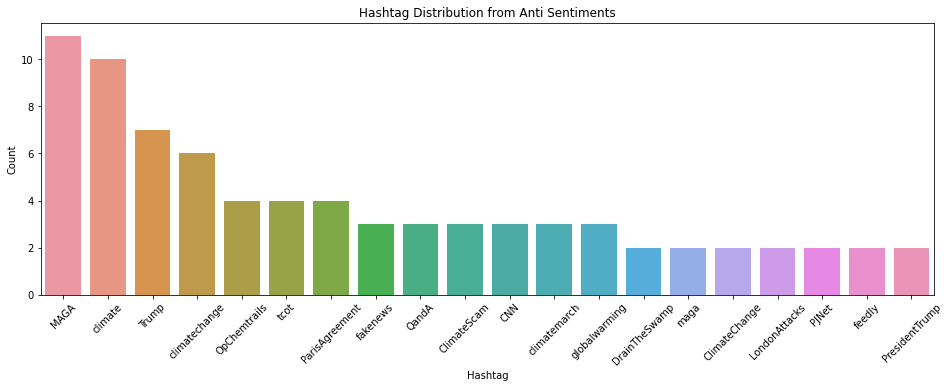

In [93]:
a = nltk.FreqDist(HT_Anti)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.title('Hashtag Distribution from Anti Sentiments')
plt.xticks(rotation=45)
plt.show()

observation

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


### Here, we will clean up our train and test data, and get them ready for model building and testing

In [144]:
## Remove urls
print ('Removing URLs...')
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-link'
train['clean'] = train['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

## Remove urls test

pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-link'
test['clean'] = test['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

Removing URLs...


In [145]:
# Make lower case

train['clean'] = train['clean'].str.lower()
test['clean'] = test['clean'].str.lower()

In [146]:
#Punctuations removal:

def remove_punctuation_numbers(post):
    punc_numbers = string.punctuation + '0123456789'
    return ''.join([l for l in post if l not in punc_numbers])
train['clean'] = train['clean'].apply(remove_punctuation_numbers)
test['clean'] = test['clean'].apply(remove_punctuation_numbers)

In [147]:
#Removed NonAscii

def _removeNonAscii(s): 
    return "".join(i for i in s if ord(i)<128)

train['clean'] = train['clean'].apply(_removeNonAscii)
test['clean'] = test['clean'].apply(_removeNonAscii)

In [148]:
# Clean the word using stemming
stema = PorterStemmer()
train['clean'] = [stema.stem(word) for word in train['clean']]
test['clean'] = [stema.stem(word) for word in test['clean']]


In [149]:
#Stopword removal:

train['clean'] = [word for word in train['clean'] if word not in ENGLISH_STOP_WORDS]
test['clean'] = [word for word in test['clean'] if word not in ENGLISH_STOP_WORDS]


In [150]:
train.head()

,sentiment,message,tweetid,clean
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221,polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and wait what urllink via mash
1,1,It's not like we lack evidence of anthropogenic global warming,126103,its not like we lack evidence of anthropogenic global warm
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562,rt rawstory researchers say we have three years to act on climate change before its too late urllink urllink
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736,todayinmaker wired was a pivotal year in the war on climate change urllink
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954,rt soynoviodetodas its and a racist sexist climate change denying bigot is leading in the polls electionnight


In [151]:
#Adding length of cleaned tweet to dataset
train['new_len']= train['clean'].apply(lambda x:len(x))
test['new_len']= test['clean'].apply(lambda x:len(x))
train.head()

,sentiment,message,tweetid,clean,new_len
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221,polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and wait what urllink via mash,113
1,1,It's not like we lack evidence of anthropogenic global warming,126103,its not like we lack evidence of anthropogenic global warm,58
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562,rt rawstory researchers say we have three years to act on climate change before its too late urllink urllink,108
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736,todayinmaker wired was a pivotal year in the war on climate change urllink,76
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954,rt soynoviodetodas its and a racist sexist climate change denying bigot is leading in the polls electionnight,110


In [152]:
# Function that returns number of words in a string
def count_words(string):
# Split the string into words
    words = string.split()    
    # Return the number of words
    return len(words)
# Create a new feature word_count
train['word_count'] = train['clean'].apply(count_words)
test['word_count'] = test['clean'].apply(count_words)

In [153]:
# Function that returns numner of hashtags in a string
def count_hashtags(string):
	# Split the string into words
    words = string.split()    
    # Create a list of words that are hashtags
    hashtags = [word for word in words if word.startswith('#')]    
    # Return number of hashtags
    return(len(hashtags))

# Create a feature hashtag_count and display distribution
train['hashtag_count'] = train['message'].apply(count_hashtags)
test['hashtag_count'] = test['message'].apply(count_hashtags)

In [154]:
# Function that returns numner of stopwords in a string
def count_stopwords(string):
	# Split the string into words
    words = string.split()    
    # Create a list of words that are stopwords
    stop_w = [word for word in words if word in ENGLISH_STOP_WORDS]    
    # Return number of stopwords
    return(len(stop_w))

# Create a feature hashtag_count and display distribution
train['stop_count'] = train['message'].apply(count_stopwords)
test['stop_count'] = test['message'].apply(count_stopwords)

In [155]:
# Function that returns numner of mentions in a string
def count_mentions(string):
	# Split the string into words
    words = string.split()    
    # Create a list of words that are mentions
    mentions = [word for word in words if word.startswith('@')]    
    # Return number of hashtags
    return(len(mentions))
# Create a feature hashtag_count and display distribution
train['mention_count'] = train['message'].apply(count_mentions)
test['mention_count'] = test['message'].apply(count_mentions)

In [156]:
re_url = r'(?:http|ftp|https)://(?:[\w_-]+(?:(?:\.[\w_-]+)+))(?:[\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?'

train['qnt_unique_words'] = train['clean'].str.split().apply(lambda x : len(set(x)))
train['qnt_chars'] = train['message'].str.len()
train['qnt_punctuation'] = train['message'].str.replace(r'[\w\s#]+', '').apply(lambda x : len(x))
train['qnt_urls'] = train['message'].str.findall(re_url).apply(lambda x : len(x))
train['mean_chars_words'] = train['message'].str.split().apply(lambda x: np.mean([len(w) for w in x]))

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


In [157]:
train.head(3)

,sentiment,message,tweetid,clean,new_len,word_count,hashtag_count,stop_count,mention_count,qnt_unique_words,qnt_chars,qnt_punctuation,qnt_urls,mean_chars_words
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221,polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and wait what urllink via mash,113,19,0,3,1,19,140,12,1,6.421053
1,1,It's not like we lack evidence of anthropogenic global warming,126103,its not like we lack evidence of anthropogenic global warm,58,10,0,3,0,10,62,1,0,5.300000
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562,rt rawstory researchers say we have three years to act on climate change before its too late urllink urllink,108,19,0,7,1,18,140,14,2,6.421053


In [158]:
test['qnt_unique_words'] = test['clean'].str.split().apply(lambda x : len(set(x)))
test['qnt_chars'] = test['message'].str.len()
test['qnt_punctuation'] = test['message'].str.replace(r'[\w\s#]+', '').apply(lambda x : len(x))
test['qnt_urls'] = test['message'].str.findall(re_url).apply(lambda x : len(x))
test['mean_chars_words'] = test['message'].str.split().apply(lambda x: np.mean([len(w) for w in x]))

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [159]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   message           10546 non-null  object 
 1   tweetid           10546 non-null  int64  
 2   clean             10546 non-null  object 
 3   new_len           10546 non-null  int64  
 4   word_count        10546 non-null  int64  
 5   hashtag_count     10546 non-null  int64  
 6   stop_count        10546 non-null  int64  
 7   mention_count     10546 non-null  int64  
 8   qnt_unique_words  10546 non-null  int64  
 9   qnt_chars         10546 non-null  int64  
 10  qnt_punctuation   10546 non-null  int64  
 11  qnt_urls          10546 non-null  int64  
 12  mean_chars_words  10546 non-null  float64
dtypes: float64(1), int64(10), object(2)
memory usage: 1.0+ MB


In [160]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sentiment         15819 non-null  int64  
 1   message           15819 non-null  object 
 2   tweetid           15819 non-null  int64  
 3   clean             15819 non-null  object 
 4   new_len           15819 non-null  int64  
 5   word_count        15819 non-null  int64  
 6   hashtag_count     15819 non-null  int64  
 7   stop_count        15819 non-null  int64  
 8   mention_count     15819 non-null  int64  
 9   qnt_unique_words  15819 non-null  int64  
 10  qnt_chars         15819 non-null  int64  
 11  qnt_punctuation   15819 non-null  int64  
 12  qnt_urls          15819 non-null  int64  
 13  mean_chars_words  15819 non-null  float64
dtypes: float64(1), int64(11), object(2)
memory usage: 1.7+ MB


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [113]:
#Splitting you Data for X and Y
X = train['message']
y = train['sentiment']

In [114]:
# creating bag of words

vectorizer = CountVectorizer(ngram_range=(1,2), min_df=2)
# fit the model for training data
X = vectorizer.fit_transform(X)

print(X.shape)
print(y.shape)

(15819, 33271)
(15819,)


In [115]:
# creating bag of words for test data
x_test = test['message']
x_t =vectorizer.transform(x_test)


print(x_t.shape)

(10546, 33271)


In [116]:
#Split the X data into train and valid 

x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.20, random_state = 42)

#### Let's build some classification models!

In [117]:
names = ['Logistic Regression', 'Multinomial NaiveB',          
         'BaggingClassifier', 'Random Forest',  'XGBoost']

In [137]:
classifiers = [
    LogisticRegression(C=10), 
    MultinomialNB(),
    BaggingClassifier(base_estimator = LogisticRegression(C=10)),
    RandomForestClassifier(),    
    XGBClassifier()
]

In [123]:
results = []

models = {}
confusion = {}
class_report = {}


for name, clf in zip(names, classifiers):    
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(x_train, y_train)
    
    print ('... predicting')
    y_pred = clf.predict(x_train)   
    y_pred_test = clf.predict(x_valid)
    
    print ('... scoring')
    accuracy  = accuracy_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred,average="macro")
    recall    = recall_score(y_train, y_pred,average="macro")
    
    f1        = f1_score(y_train, y_pred,average="macro")    
    f1_test   = f1_score(y_valid, y_pred_test,average="macro")    
    
    # Save the results to dictionaries
    models[name] = clf    
    confusion[name] = confusion_matrix(y_train, y_pred)
    class_report[name] = classification_report(y_train, y_pred)
    
    results.append([name, accuracy, precision, recall, f1, f1_test, run_time.best])

    
results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test', 'Train Time'])
results.set_index('Classifier', inplace= True)

print ('... All done!')

Fitting Logistic Regression model...


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

... predicting
... scoring
Fitting Multinomial NaiveB model...
... predicting
... scoring
Fitting Linear SVM model...
... predicting
... scoring
Fitting BaggingClassifier model...
... predicting
... scoring
Fitting Random Forest model...
... predicting
... scoring


C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classificati

Fitting XGBoost model...
[09:20:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:21:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:21:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:21:26] WARNING: C:/Users/Administrator

#### BUILDING MODELS WITH DOWNSAMPLED DATA

In [128]:
# Separate the classes classes
neutral = train[train['sentiment']==0]
pro = train[train['sentiment']==1]
news = train[train['sentiment']==2]
anti = train[train['sentiment']== -1]

base = 1500

In [129]:
# Downsample SENTIMENTS
neutral_sampled = resample(neutral,
                          replace=False, # sample with replacement (we need to duplicate observations)
                          n_samples= base, # match number in minority class
                          random_state=27) # reproducible results

pro_sampled = resample(pro,
                          replace=False, # sample with replacement (we need to duplicate observations)
                          n_samples= base, # match number in minority class
                          random_state=27) # reproducible results

news_sampled = resample(news,
                          replace=False, # sample with replacement (we need to duplicate observations)
                          n_samples= base, # match number in minority class
                          random_state=27)

anti_sampled = resample(anti,
                          replace=True, # sample with replacement (we need to duplicate observations)
                          n_samples= base, # match number in minority class
                          random_state=27)

In [130]:
# Combine downsampled classes
train = pd.concat([neutral_sampled, pro_sampled,news_sampled,anti_sampled])

train['sentiment'].value_counts()

 0    1500
 1    1500
 2    1500
-1    1500
Name: sentiment, dtype: int64

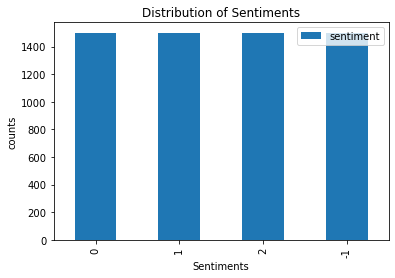

In [131]:
#Lets take a look at the breakdown of sentiments (target variable)

pd.value_counts(train['sentiment']).plot.bar()
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiments')
plt.ylabel('counts')
plt.legend()
plt.show()

### Lets build new models with the resampled data

In [132]:
#Splitting you Data for X and Y
X = train['message']
y = train['sentiment']

In [133]:
# creating bag of words

vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=2)
# fit the model for training data
X = vectorizer.fit_transform(X)

print(X.shape)
print(y.shape)

(6000, 17314)
(6000,)


In [134]:
# creating bag of words for test data
x_test = test['message']
x_t =vectorizer.transform(x_test)


print(x_t.shape)

(10546, 17314)


In [136]:
#Split the X data into train and valid 

x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [ ]:
names2 = ['Logistic Regression', 'Multinomial NaiveB',          
         'BaggingClassifier', 'Random Forest',  'XGBoost']

In [ ]:
classifiers2 = [
    LogisticRegression(C=10), 
    MultinomialNB(),
    BaggingClassifier(base_estimator = LogisticRegression(C=10)),
    RandomForestClassifier(),    
    XGBClassifier()
]

In [140]:
results_2 = []

models_2 = {}
confusion_2 = {}
class_report_2 = {}


for name, clf in zip(names2, classifiers2):    
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(x_train, y_train)
    
    print ('... predicting')
    y_pred = clf.predict(x_train)   
    y_pred_test = clf.predict(x_valid)
    
    print ('... scoring')
    accuracy  = accuracy_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred,average="macro")
    recall    = recall_score(y_train, y_pred,average="macro")
    
    f1        = f1_score(y_train, y_pred,average="macro")    
    f1_test   = f1_score(y_valid, y_pred_test,average="macro")    
    
    # Save the results to dictionaries
    models_2[name] = clf    
    confusion_2[name] = confusion_matrix(y_train, y_pred)
    class_report_2[name] = classification_report(y_train, y_pred)
    
    results_2.append([name, accuracy, precision, recall, f1, f1_test, run_time.best])

    
results_2 = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test', 'Train Time'])
results_2.set_index('Classifier', inplace= True)

print ('... All done!')

Fitting Logistic Regression model...


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

... predicting
... scoring
Fitting Multinomial NaiveB model...
... predicting
... scoring
Fitting Linear SVM model...
... predicting
... scoring
Fitting BaggingClassifier model...


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

... predicting
... scoring
Fitting Random Forest model...
... predicting
... scoring
Fitting XGBoost model...


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:06:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:06:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:07:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:07:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

#### BUILDING MODELS WITH UPSAMPLED DATA

In [161]:
# Separate the classes classes
neutral = train[train['sentiment']==0]
pro = train[train['sentiment']==1]
news = train[train['sentiment']==2]
anti = train[train['sentiment']== -1]

base = 5000

In [162]:
# UPSAMPLE SENTIMENTS
neutral_sampled = resample(neutral,
                          replace=True, # sample with replacement (we need to duplicate observations)
                          n_samples= base, # match number in minority class
                          random_state=27) # reproducible results

pro_sampled = resample(pro,
                          replace=False, # sample with replacement (we dont need to duplicate observations)
                          n_samples= base, # match number in minority class
                          random_state=27) # reproducible results

news_sampled = resample(news,
                          replace=True, # sample with replacement (we need to duplicate observations)
                          n_samples= base, # match number in minority class
                          random_state=27)

anti_sampled = resample(anti,
                          replace=True, # sample with replacement (we need to duplicate observations)
                          n_samples= base, # match number in minority class
                          random_state=27)

In [163]:
# Combine downsampled classes
train = pd.concat([neutral_sampled, pro_sampled,news_sampled,anti_sampled])

train['sentiment'].value_counts()

 0    5000
 1    5000
 2    5000
-1    5000
Name: sentiment, dtype: int64

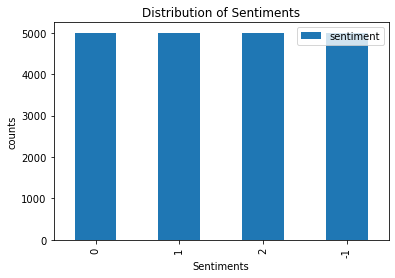

In [164]:
#Lets take a look at the breakdown of sentiments (target variable)

pd.value_counts(train['sentiment']).plot.bar()
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiments')
plt.ylabel('counts')
plt.legend()
plt.show()

#### Let's build models with our upsampled data

In [165]:
#Splitting you Data for X and Y
X = train['message']
y = train['sentiment']

In [166]:
# creating bag of words

vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=2)
# fit the model for training data
X = vectorizer.fit_transform(X)

print(X.shape)
print(y.shape)

(20000, 58835)
(20000,)


In [167]:
# creating bag of words for test data
x_test = test['message']
x_t =vectorizer.transform(x_test)


print(x_t.shape)

(10546, 58835)


In [168]:
#Split the X data into train and valid 

x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [ ]:
names3 = ['Logistic Regression', 'Multinomial NaiveB',          
         'BaggingClassifier', 'Random Forest',  'XGBoost']

In [ ]:
classifiers3 = [
    LogisticRegression(C=10), 
    MultinomialNB(),
    BaggingClassifier(base_estimator = LogisticRegression(C=10)),
    RandomForestClassifier(),    
    XGBClassifier()
]

In [169]:
results_3 = []

models_3 = {}
confusion_3 = {}
class_report_3 = {}


for name, clf in zip(names3, classifiers3):    
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(x_train, y_train)
    
    print ('... predicting')
    y_pred = clf.predict(x_train)   
    y_pred_test = clf.predict(x_valid)
    
    print ('... scoring')
    accuracy  = accuracy_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred,average="macro")
    recall    = recall_score(y_train, y_pred,average="macro")
    
    f1        = f1_score(y_train, y_pred,average="macro")    
    f1_test   = f1_score(y_valid, y_pred_test,average="macro")    
    
    # Save the results to dictionaries
    models_3[name] = clf    
    confusion_3[name] = confusion_matrix(y_train, y_pred)
    class_report_3[name] = classification_report(y_train, y_pred)
    
    results_3.append([name, accuracy, precision, recall, f1, f1_test, run_time.best])

    
results_3 = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test', 'Train Time'])
results_3.set_index('Classifier', inplace= True)

print ('... All done!')

Fitting Logistic Regression model...


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

... predicting
... scoring
Fitting Multinomial NaiveB model...
... predicting
... scoring
Fitting Linear SVM model...
... predicting
... scoring
Fitting BaggingClassifier model...


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

... predicting
... scoring
Fitting Random Forest model...
... predicting
... scoring
Fitting XGBoost model...


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:10:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:13:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

#### Lets see how the general data performed

In [124]:
results.sort_values('F1 Train', ascending=False)

,Accuracy,Precision,Recall,F1 Train,F1 Test,Train Time
Classifier,,,,,,
Logistic Regression,0.997471,0.997222,0.996489,0.996851,0.680284,10.149112
BaggingClassifier,0.978427,0.982665,0.967926,0.975120,0.558207,172.366743
Multinomial NaiveB,0.870802,0.878200,0.827414,0.845848,0.649229,0.018578
XGBoost,0.822284,0.857682,0.718306,0.763009,0.620232,12.301244
Linear SVM,0.814145,0.863561,0.672695,0.722734,0.606926,143.497488
Random Forest,0.535362,0.133840,0.250000,0.174344,0.178390,0.317572


<AxesSubplot:xlabel='Classifier'>

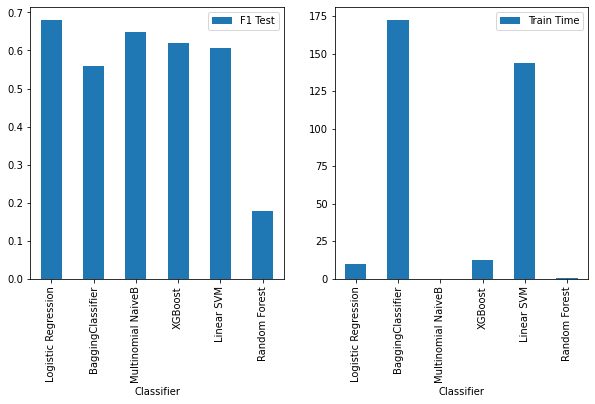

In [127]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
results.sort_values('F1 Train', ascending=False, inplace=True)
results.plot(y='F1 Test', kind='bar', ax=ax[0], xlim=[0,1.1])
results.plot(y='Train Time', kind='bar', ax=ax[1])

### Let us see how our down-sampled data performed

In [174]:
results_2.set_index(names, inplace= True)

KeyError: "None of ['Logistic Regression', 'Multinomial NaiveB', 'Linear SVM', 'BaggingClassifier', 'Random Forest', 'XGBoost'] are in the columns"

In [170]:
results_2.sort_values('F1 Train', ascending=False)

,Accuracy,Precision,Recall,F1 Train,F1 Test,Train Time
Classifier,,,,,,
NaN,0.997471,0.997222,0.996489,0.996851,0.680284,10.149112
NaN,0.978427,0.982665,0.967926,0.975120,0.558207,172.366743
NaN,0.870802,0.878200,0.827414,0.845848,0.649229,0.018578
NaN,0.822284,0.857682,0.718306,0.763009,0.620232,12.301244
NaN,0.814145,0.863561,0.672695,0.722734,0.606926,143.497488
NaN,0.535362,0.133840,0.250000,0.174344,0.178390,0.317572


In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
results_2.sort_values('F1 Train', ascending=False, inplace=True)
results_2.plot(y=['F1 Test'], kind='bar', ax=ax[0], xlim=[0,1.1], ylim=[0.85,0.92])
results_2.plot(y='Train Time', kind='bar', ax=ax[1])

### Let us see how our Up-sampled data performed

In [ ]:
results_3.sort_values('F1 Train', ascending=False)

In [56]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
results_3.sort_values('F1 Train', ascending=False, inplace=True)
results_3.plot(y=['F1 Test'], kind='bar', ax=ax[0], xlim=[0,1.1], ylim=[0.85,0.92])
results_3.plot(y='Train Time', kind='bar', ax=ax[1])

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

### Prepare Kaggle submission data from the models

In [ ]:
bgc.fit(X,y)
m_nb.fit(X,y)
lgr.fit(X,y)

In [ ]:
rf.fit(X,y)

In [ ]:
rf1_pred = rf.predict(x_t)

In [ ]:
lg1_pred = lgr.predict(x_t)
m_nb_pred = m_nb.predict(x_t)
gb = xgb.predict(x_t)
bgc_1 = bgc.predict(x_t)

In [ ]:
# # Create a submission file xgb
sub_file1 = samplesubmission.copy()

sub_file1.sentiment = rf1_pred
sub_file1.to_csv("rf_55.csv", index = False)

sub_file2 = samplesubmission.copy()

sub_file2.sentiment = lgy_pred
sub_file2.to_csv("lg_66.csv", index = False)

sub_file3 = samplesubmission.copy()

sub_file3.sentiment = gb
sub_file3.to_csv("gb2_55.csv", index = False)

sub_file5 = samplesubmission.copy()

sub_file5.sentiment = bgc_1
sub_file5.to_csv("bgc_55.csv", index = False)

sub_file4 = samplesubmission.copy()

sub_file4.sentiment = m_nb_pred
sub_file4.to_csv("nb_55.csv", index = False)

In [51]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/beebeefaith/classification-predict-team-4/2fcaab88026249f7880eb74c4b4eb59c
COMET INFO:   Parameters:
COMET INFO:     C                                 : 10
COMET INFO:     alpha                             : 1.0
COMET INFO:     base_estimator                    : LogisticRegression(C=10, multi_class='ovr')
COMET INFO:     base_estimator__C                 : 10
COMET INFO:     base_estimator__class_weight      : 1
COMET INFO:     base_estimator__dual              : False
COMET INFO:     base_estimator__fit_intercept     : True
COMET INFO:     base_estimator__intercept_scaling : 1
COMET INFO:     base_estimator__l1_ratio          : 1
COMET INFO:     base_estimator__max_iter          : 100
COMET INFO:     base_estimator__multi_class       : ovr
COMET